In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
fertilizer = pd.read_csv('/Users/vinuthnarajeswari/Desktop/cfrs/dataset/Fertilizer Prediction copy.csv')

In [3]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
fertilizer.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [5]:
fertilizer.shape

(99, 9)

In [6]:
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [7]:
# to check missing values
fertilizer.isnull()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
94,False,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False


In [8]:
fertilizer.isnull().sum() # to check missing values

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [9]:
fertilizer.duplicated() # to check duplicate values

0     False
1     False
2     False
3     False
4     False
      ...  
94    False
95    False
96    False
97    False
98    False
Length: 99, dtype: bool

In [10]:
fertilizer.duplicated().sum() # to check duplicate values

0

In [11]:
fertilizer.describe() # to check the statistics of the data set

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [12]:
fertilizer.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [14]:
#Check the target feature distribution
fertilizer['Soil Type'].value_counts()

Soil Type
Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: count, dtype: int64

In [15]:
#Check the target feature distribution
fertilizer['Crop Type'].value_counts()

Crop Type
Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: count, dtype: int64

In [16]:
#Check the target feature distribution
fertilizer['Fertilizer Name'].value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

In [18]:
features=fertilizer.columns.to_list()
features.remove('Soil Type')
features.remove('Crop Type')
features.remove('Fertilizer Name')
print(features)

['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']


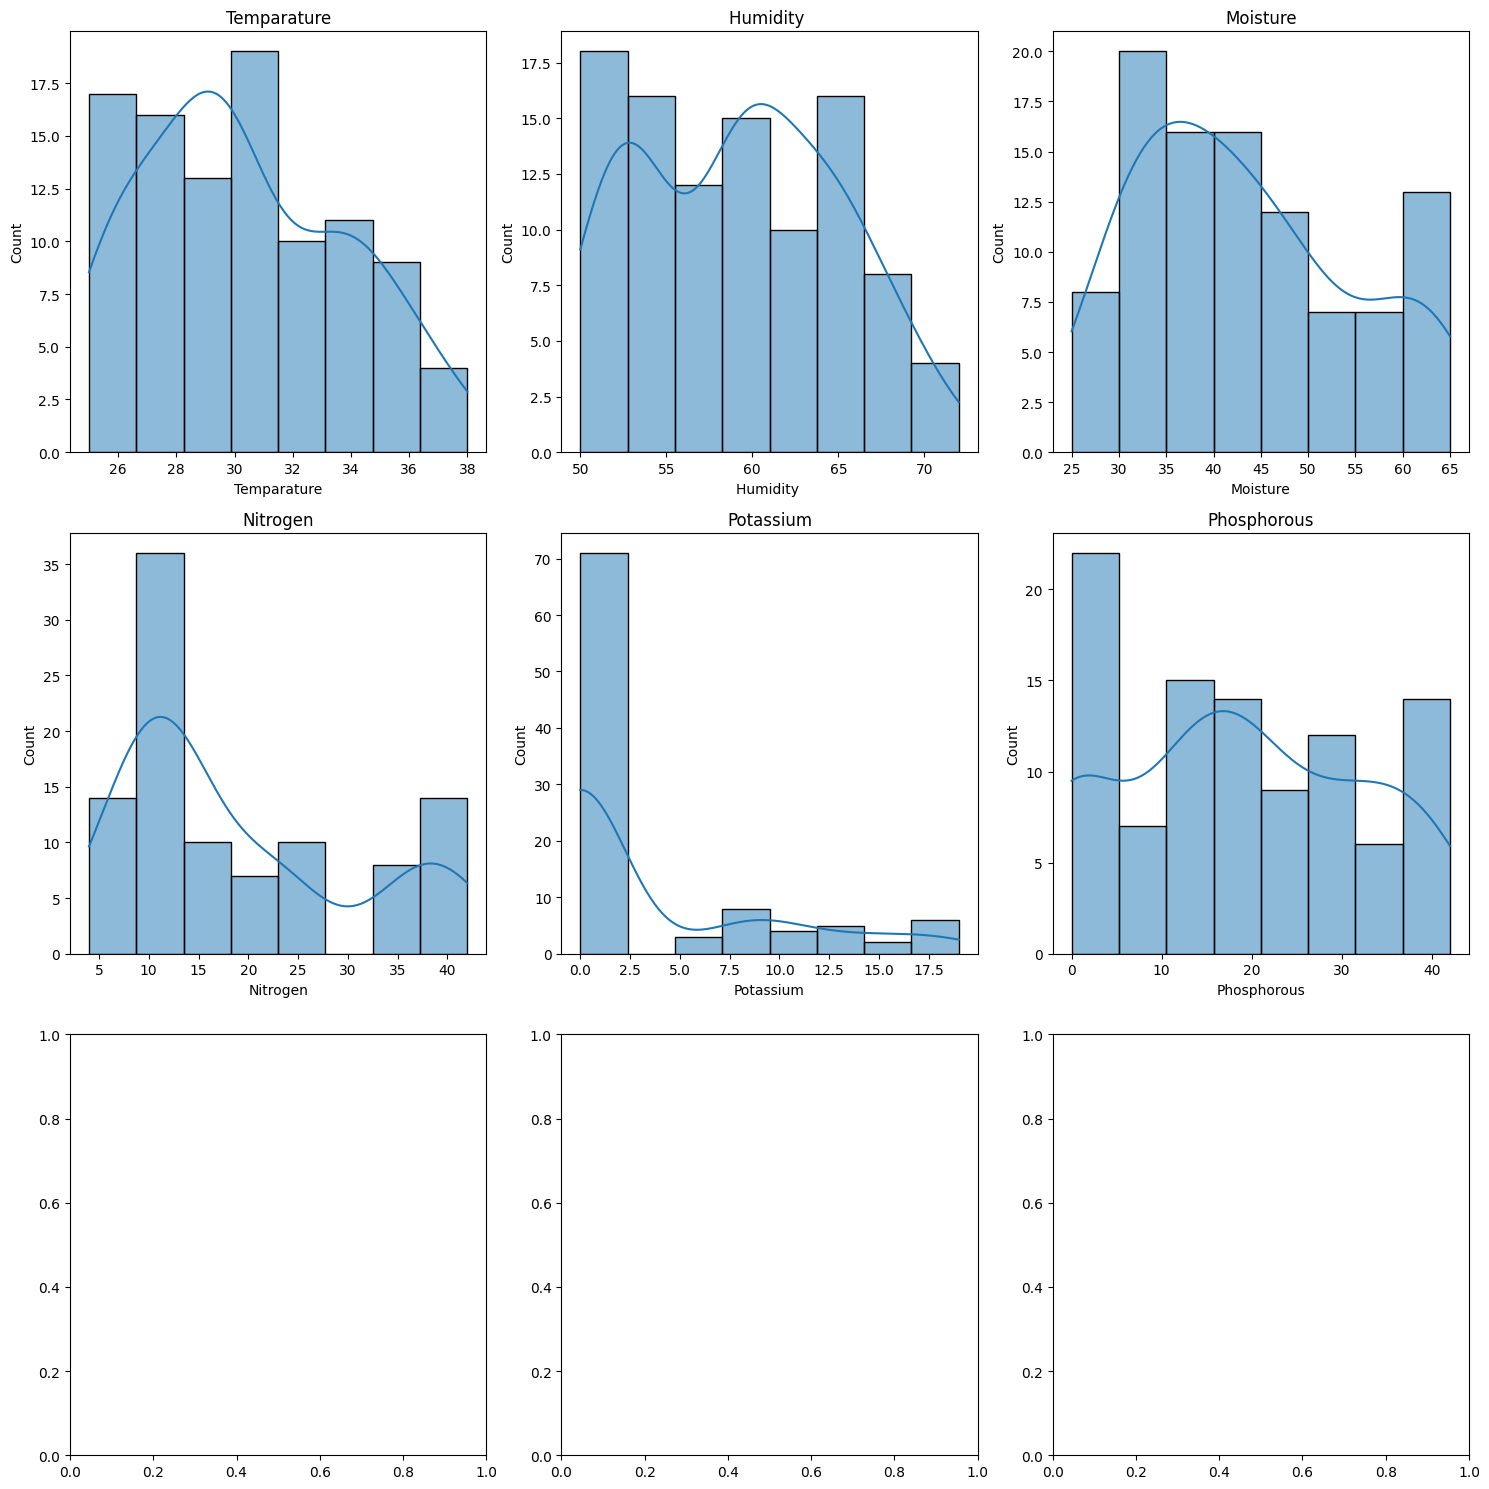

In [19]:
#visualize the distribution of each feature
import seaborn as sns
fig, ax=plt.subplots(3,3,figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(fertilizer[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

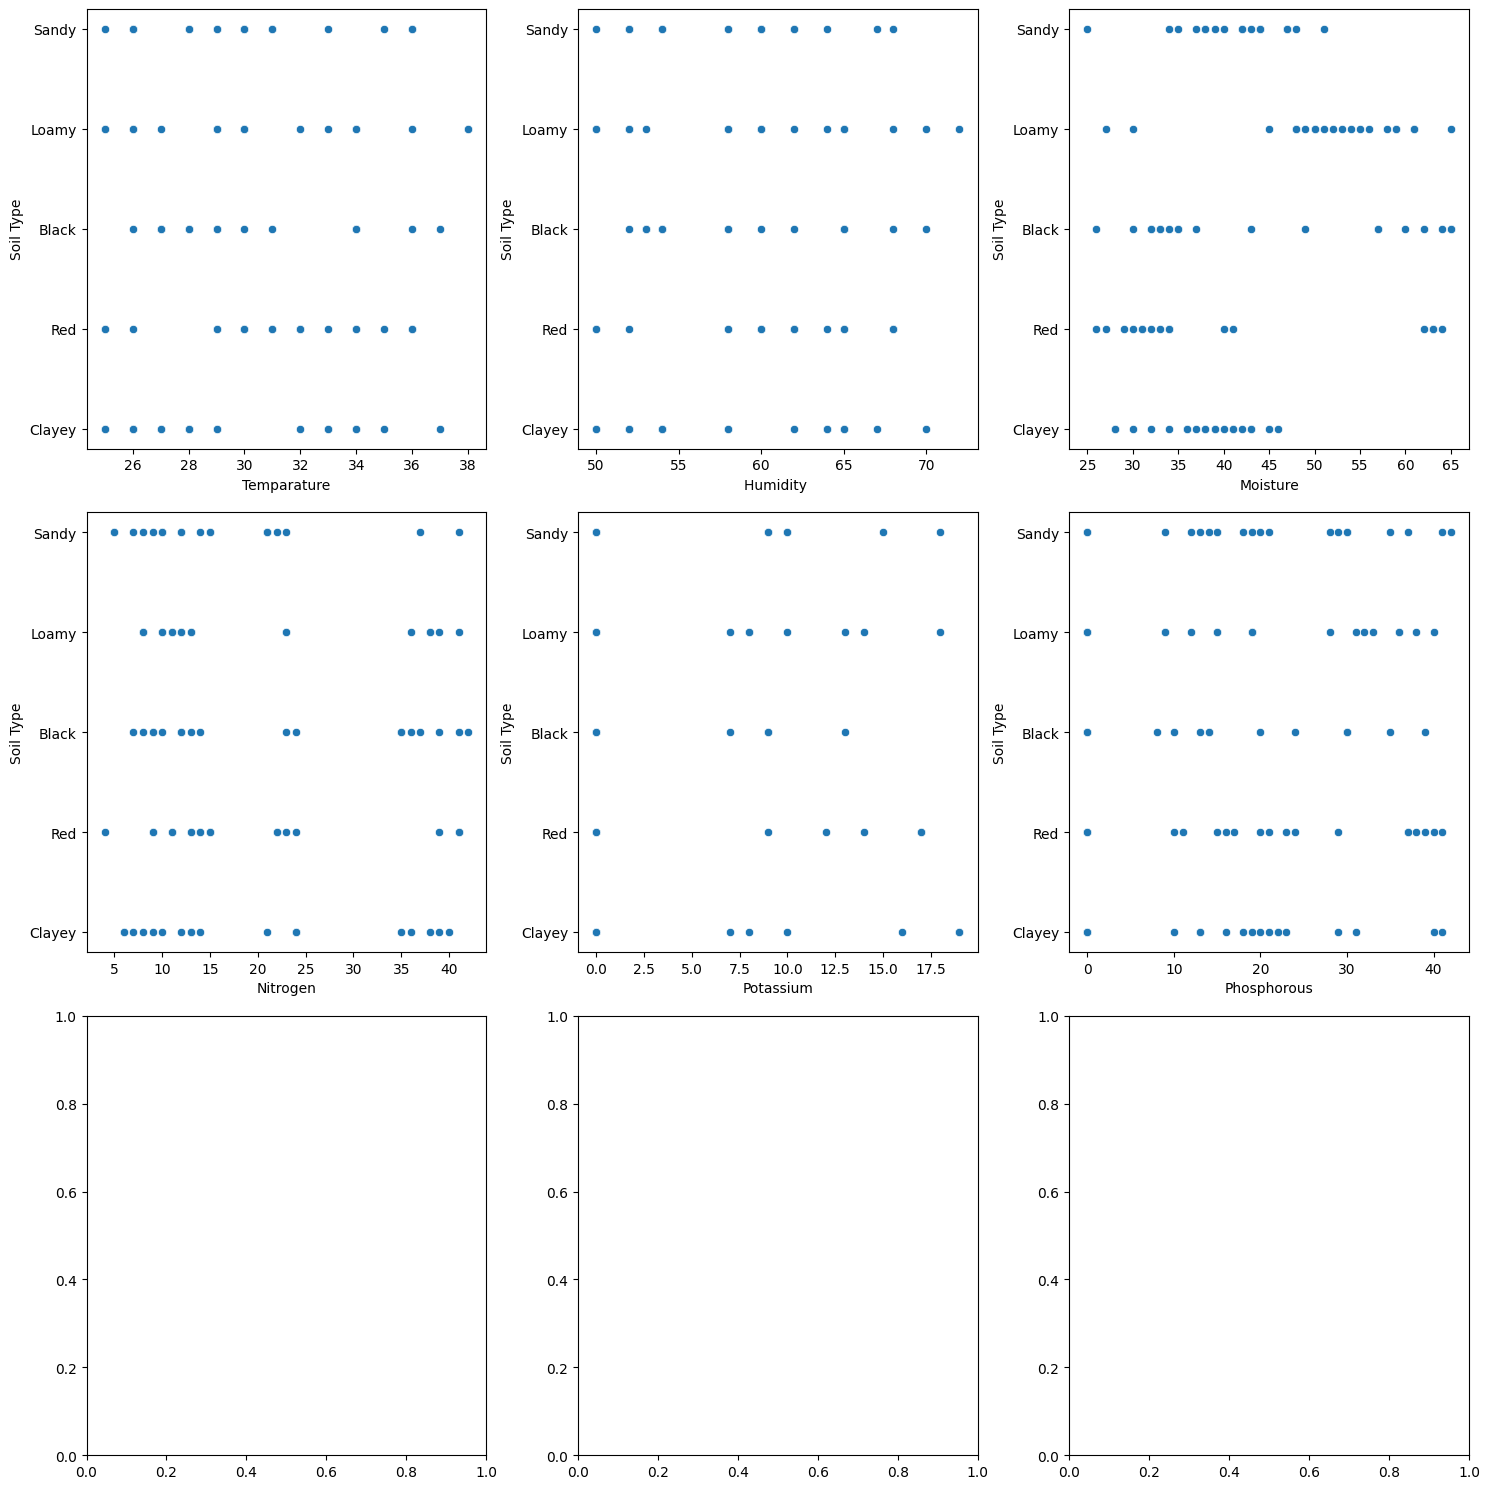

In [21]:
#plot scatter plot
fig, ax=plt.subplots(3,3,figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='Soil Type', data=fertilizer, ax=subplot)
plt.tight_layout()
plt.show()

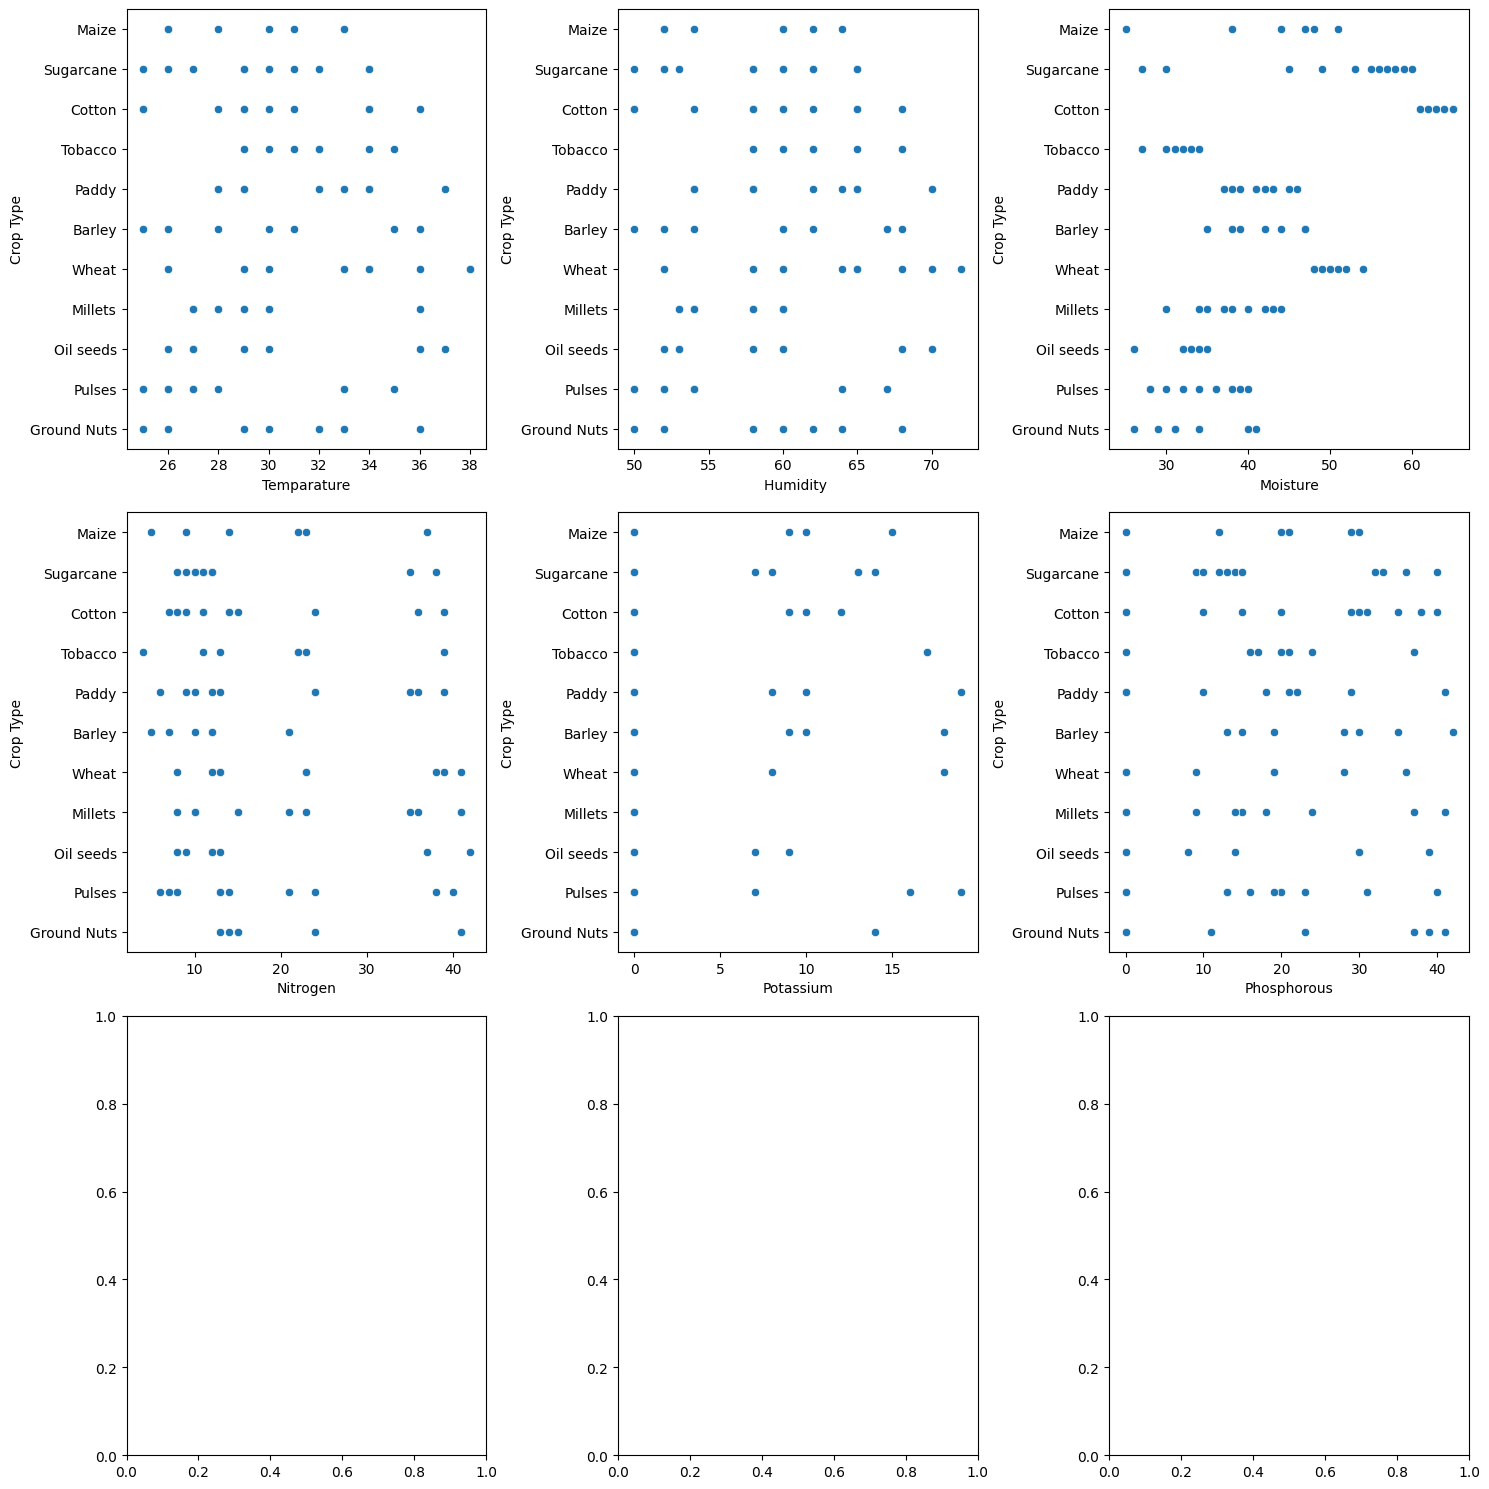

In [22]:
#plot scatter plot
fig, ax=plt.subplots(3,3,figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='Crop Type', data=fertilizer, ax=subplot)
plt.tight_layout()
plt.show()

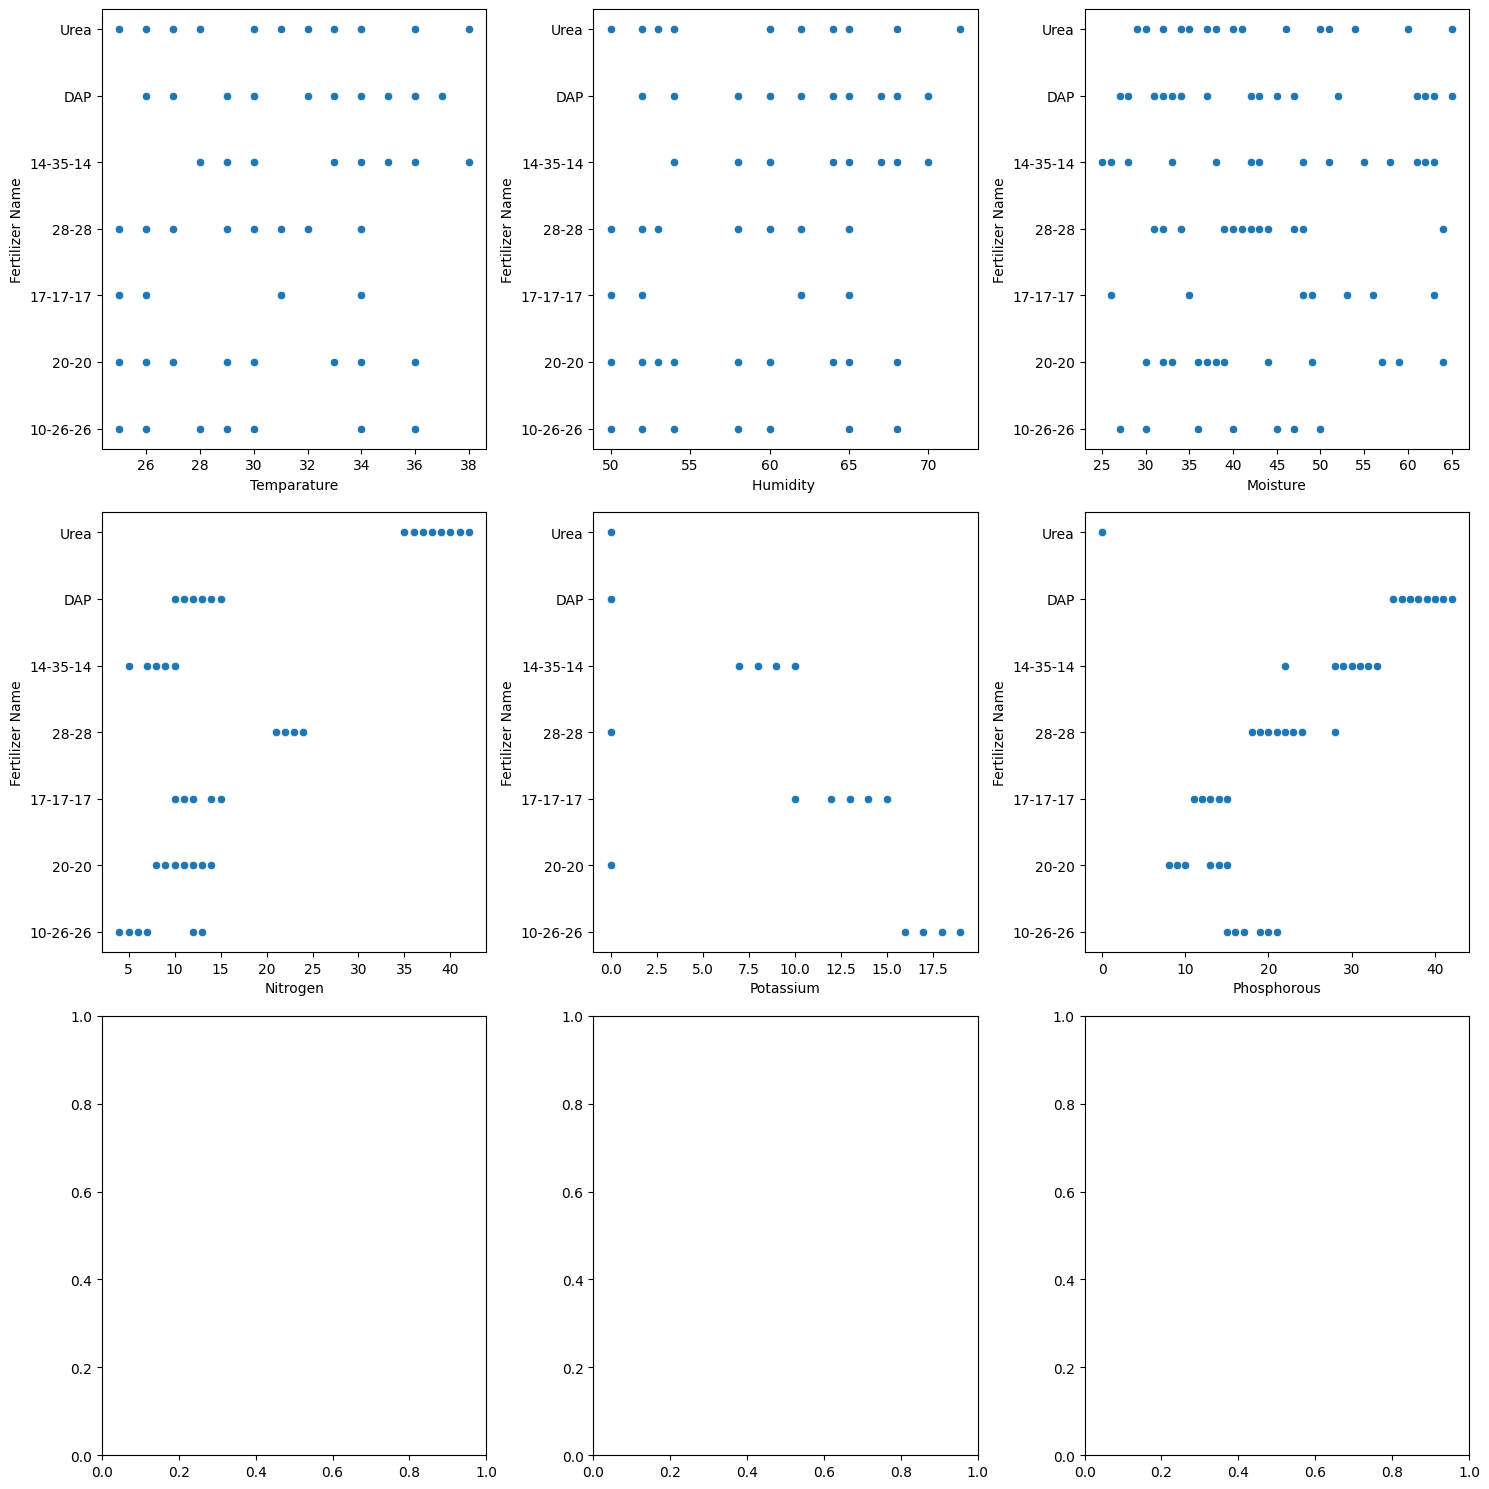

In [23]:
#plot scatter plot
fig, ax=plt.subplots(3,3,figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='Fertilizer Name', data=fertilizer, ax=subplot)
plt.tight_layout()
plt.show()

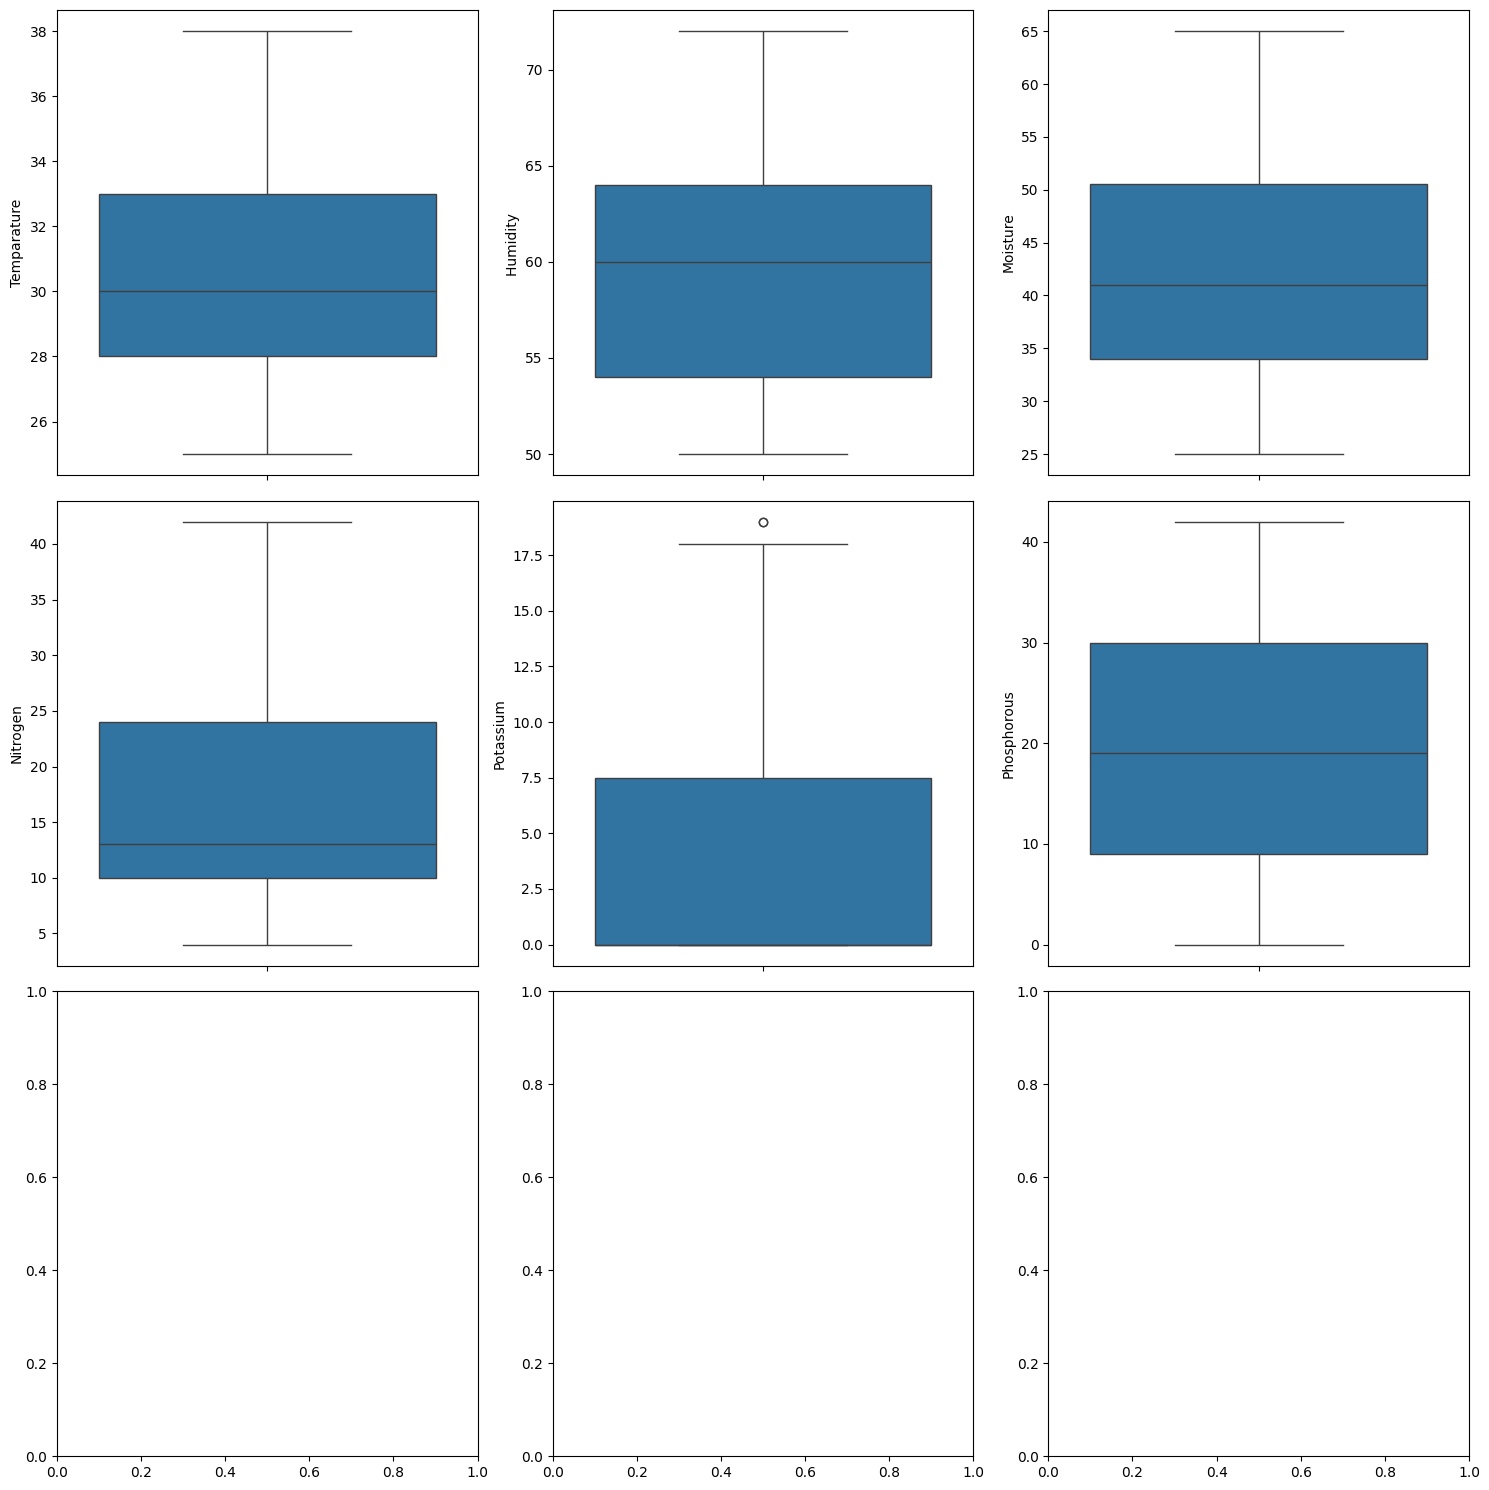

In [24]:
#finding outliers
fig, ax=plt.subplots(3,3,figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(fertilizer[i], ax=subplot)
plt.tight_layout()
plt.show()

In [25]:
#correlation of the features
num_cols = fertilizer.select_dtypes(include=[np.number])
num_cols

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,26,52,38,37,0,0
1,29,52,45,12,0,36
2,34,65,62,7,9,30
3,32,62,34,22,0,20
4,28,54,46,35,0,0
...,...,...,...,...,...,...
94,25,50,32,24,0,19
95,30,60,27,4,17,17
96,38,72,51,39,0,0
97,36,60,43,15,0,41


In [26]:
corr=num_cols.corr()
corr

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


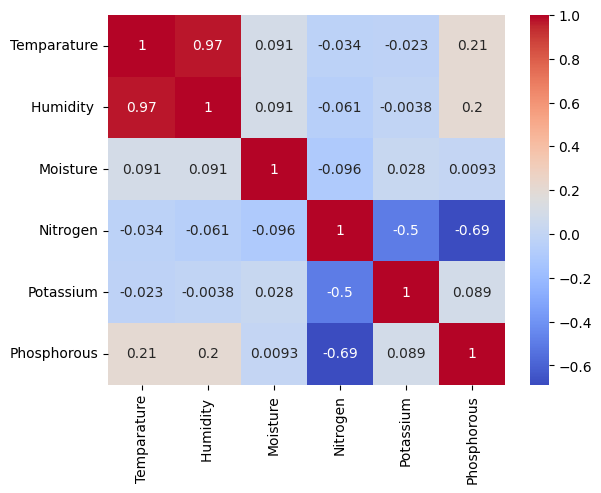

In [27]:
#visualizing with heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()